#Build Aura - The Intelligent Prediction and Recommendation Engine for digital marketers.

In [347]:
# Import relevant Python libraries necessary for Python programming and Numpy for doing numerical operations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [348]:
# Import the CSV file – NSMES1988.csv into a dataframe.

healthcare = pd.read_csv('/content/NSMES1988.csv')
healthcare.head()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


In [349]:
# Inspect the data and report the details from physical inspection – rows, columns, data types etc.

healthcare.drop('Unnamed: 0', axis=1, inplace=True)
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 619.7+ KB


In [350]:
# Find out if the data is clean or if the data has missing values.
healthcare.isna().sum()

,0
visits,0
nvisits,0
ovisits,0
novisits,0
emergency,0
hospital,0
health,0
chronic,0
adl,0
region,0


Develop a comprehensive solution for data aggregation, wrangling, and visualization using a
healthcare dataset for the Aura platform


In [351]:
# Comment on the data types, their values and range, specifically on age and income columns.
print("Data Types:")
print(healthcare.dtypes)

Data Types:
visits         int64
nvisits        int64
ovisits        int64
novisits       int64
emergency      int64
hospital       int64
health        object
chronic        int64
adl           object
region        object
age          float64
gender        object
married       object
school         int64
income       float64
employed      object
insurance     object
medicaid      object
dtype: object


In [352]:
# We will reverse the age and income

healthcare['actual_age'] = healthcare['age'] * 10
healthcare['actual_income'] = healthcare['income'] * 10000
healthcare.head()


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid,actual_age,actual_income
0,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no,69.0,28810.0
1,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no,74.0,27478.0
2,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes,66.0,6532.0
3,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no,76.0,6588.0
4,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no,79.0,6588.0


In [353]:
print("\t\tAge Analysis")
print("-" * 50)
min_age = healthcare['actual_age'].min()
max_age = healthcare['actual_age'].max()
mean_age = healthcare['actual_age'].mean()
age_variance = healthcare['actual_age'].var()
std_dev_age = healthcare['actual_age'].std()

print(f"Minimum Age: {min_age} years")
print(f"Maximum Age: {max_age} years")
print(f"Average Age: {mean_age:.2f} years")
print(f"Variance in age: {age_variance:.2f}")
print(f"Standard Deviation of Age: {std_dev_age:.2f} years")
print("-" * 50)
print("Comments on Age:")
print(f"- The data type for age is float.")
print(f"- The patient population in this dataset ranges from {min_age} to {max_age} years old, indicating a broad spectrum of ages.")
print(f"- The average age of patients is approximately {mean_age:.2f} years, suggesting that the typical patient falls within this age group.")
print(f"- The standard deviation of {std_dev_age:.2f} years indicates the typical spread of ages around the mean. This suggests that the ages are relatively [e.g., moderately spread out].")


		Age Analysis
--------------------------------------------------
Minimum Age: 66.0 years
Maximum Age: 109.0 years
Average Age: 74.02 years
Variance in age: 40.12
Standard Deviation of Age: 6.33 years
--------------------------------------------------
Comments on Age:
- The data type for age is float.
- The patient population in this dataset ranges from 66.0 to 109.0 years old, indicating a broad spectrum of ages.
- The average age of patients is approximately 74.02 years, suggesting that the typical patient falls within this age group.
- The standard deviation of 6.33 years indicates the typical spread of ages around the mean. This suggests that the ages are relatively [e.g., moderately spread out].


In [354]:
view = healthcare['actual_income'].sort_values(ascending=True)
view

,actual_income
909,-10125.0
910,-10125.0
2592,-8180.0
2847,0.0
1035,0.0
...,...
942,360024.0
1516,417596.0
1515,417596.0
2978,548351.0


In [355]:
# Income column has some negative values that needs correction, therefore we will
# impute the negative income with 0

healthcare['actual_income'] = healthcare['actual_income'].apply(lambda x: 0 if x < 0 else x)
healthcare['actual_income'].sort_values(ascending=True)

,actual_income
909,0.0
910,0.0
2847,0.0
2455,0.0
1035,0.0
...,...
942,360024.0
1516,417596.0
1515,417596.0
2978,548351.0


In [356]:
healthcare[['actual_age', 'actual_income']].sort_values(by='actual_income', ascending=True)

,actual_age,actual_income
909,78.0,0.0
910,75.0,0.0
2847,77.0,0.0
2455,67.0,0.0
1035,70.0,0.0
...,...,...
942,67.0,360024.0
1516,75.0,417596.0
1515,76.0,417596.0
2978,74.0,548351.0


In [357]:
zero_income = np.where(healthcare['actual_income'] == 0)
zero_income

(array([ 177,  178,  802,  803,  864,  909,  910, 1035, 1683, 1798, 1959,
        2455, 2592, 2678, 2847, 2848, 2952, 3129, 3173, 3174, 3450]),)

In [358]:
healthcare[['income', 'employed']].sort_values(by='income', ascending=True)

,income,employed
909,-1.0125,no
910,-1.0125,no
2592,-0.8180,no
2847,0.0000,no
1035,0.0000,no
...,...,...
942,36.0024,no
1516,41.7596,yes
1515,41.7596,no
2978,54.8351,no


In [359]:
print("\t\tIncome Analysis")
print("-"*50)
print("Minimum Income", healthcare['actual_income'].min())
print("Maximum Income", healthcare['actual_income'].max())
print("Average Income", healthcare['actual_income'].mean())
print("Variance in income", healthcare['actual_income'].var())
print("Standard Deviation of Income", healthcare['actual_income'].std(),"\n")
print("-" * 50)
print("Comments on Income:")
print(f"- The income data type is float.")
print(f"- The income previously shown in negative has been changed to 0 given some patients might not be working.")
print(f"- The maximum earnings per year is {healthcare['actual_income'].max()}.")
print(f"- The average income of the patient is approximately {healthcare['actual_income'].mean()}")
print(f"- The standard deviation of {healthcare['actual_income'].std()} depicts that typical spread of income around the mean.")

		Income Analysis
--------------------------------------------------
Minimum Income 0.0
Maximum Income 548351.0
Average Income 25277.77303222878
Variance in income 854968388.2577076
Standard Deviation of Income 29239.842480042666 

--------------------------------------------------
Comments on Income:
- The income data type is float.
- The income previously shown in negative has been changed to 0 given some patients might not be working.
- The maximum earnings per year is 548351.0.
- The average income of the patient is approximately 25277.77303222878
- The standard deviation of 29239.842480042666 depicts that typical spread of income around the mean.


In [360]:
# Export the data to JSON as NSMES1988.json format file and view and enter your comments.

import json

# Data Types converted to strings as strings are JSON serializable

data_types = {
    'visits': str(pd.Int64Dtype()),
    'nvisits': str(pd.Int64Dtype()),
    'ovisits': str(pd.Int64Dtype()),
    'novisits': str(pd.Int64Dtype()),
    'emergency': str(pd.Int64Dtype()),
    'hospital': str(pd.Int64Dtype()),
    'health': 'object',
    'chronic': str(pd.Int64Dtype()),
    'adl': 'object',
    'region': 'object',
    'age': str(pd.Float64Dtype()),
    'gender': 'object',
    'married': 'object',
    'school': str(pd.Int64Dtype()),
    'income': str(pd.Float64Dtype()),
    'employed': 'object',
    'insurance': 'object',
    'medicaid': 'object'
}

# Income Comments

income_comments = [
    "The income data type is float."
    "The income previously shown in negative has been changed to 0 given some patients might not be working."
    "The maximum earnings per year is 548351.0."
    "The average income of the patient is approximately 25277.77303222878"
    "The standard deviation of 29239.842480042666 depicts that typical spread of income around the mean."
]

# Income statistics

Minimum_Income = 0.0
Maximum_Income = 548351.0
Average_Income = 25277.77303222878
Variance_income = 854968388.2577076
Standard_Deviation_Income = 29239.842480042666

# Age Statistics

Minimum_Age = 66.0
Maximum_Age = 109.0
Average_Age = 74.02
Variance_age = 40.12
Standard_Deviation_Age = 6.33

# Age comments
Age_comments = [
    "The data type for age is float."
    "The patient population in this dataset ranges from 66.0 to 109.0 years old, indicating a broad spectrum of ages."
    "The average age of patients is approximately 74.02 years, suggesting that the typical patient falls within this age group."
    "The standard deviation of 6.33 years indicates the typical spread of ages around the mean. This suggests that the ages are relatively."
                ]
# Convert the pandas DataFrame to a list of dictionaries

#data_list = healthcare.to_dict(orient='records')

output_data = {
    "income statistics" : {
        "Minimum Income": Minimum_Income,
        "Maximum Income": Maximum_Income,
        "Average Income": Average_Income,
        "Variance in Income": Variance_income,
        "Standard Deviation in Income": Standard_Deviation_Income,
        "Comments" : income_comments
    },
    "age statistics" : {
        "Minimum Age": Minimum_Age,
        "Maximum Age": Maximum_Age,
        "Average Age": Average_Age,
        "Variance age": Variance_age,
        "Standard Deviation of Age": Standard_Deviation_Age,
        "Comments" : Age_comments
    },
    "data types": data_types,
    #"data": data_list
}

# Export the combined data and comments to a JSON file

filename = 'NSMES1988.json'

with open(filename, 'w') as file:
  json.dump(output_data, file, indent=4)

print(f"Data and analysis comments have been successfully exported to {filename}")

Data and analysis comments have been successfully exported to NSMES1988.json


Perform memory information on the data and recommend what non-default data types
would you recommend to optimize memory settings for the dataframe.




In [361]:
healthcare.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visits         4406 non-null   int64  
 1   nvisits        4406 non-null   int64  
 2   ovisits        4406 non-null   int64  
 3   novisits       4406 non-null   int64  
 4   emergency      4406 non-null   int64  
 5   hospital       4406 non-null   int64  
 6   health         4406 non-null   object 
 7   chronic        4406 non-null   int64  
 8   adl            4406 non-null   object 
 9   region         4406 non-null   object 
 10  age            4406 non-null   float64
 11  gender         4406 non-null   object 
 12  married        4406 non-null   object 
 13  school         4406 non-null   int64  
 14  income         4406 non-null   float64
 15  employed       4406 non-null   object 
 16  insurance      4406 non-null   object 
 17  medicaid       4406 non-null   object 
 18  actual_a

The 8 bytes (64 bits) integers and float tend to contribute to higher memory usage. Therefore, we will reduce it to 4 bytes (32 bits)   

In [362]:
healthcare['visits'] = healthcare['visits'].astype(np.int32)
healthcare['nvisits'] = healthcare['nvisits'].astype(np.int32)
healthcare['ovisits'] = healthcare['ovisits'].astype(np.int32)
healthcare['novisits'] = healthcare['novisits'].astype(np.int32)
healthcare['emergency'] = healthcare['emergency'].astype(np.int32)
healthcare['hospital'] = healthcare['hospital'].astype(np.int32)
healthcare['chronic'] = healthcare['chronic'].astype(np.int32)
healthcare['school'] = healthcare['school'].astype(np.int32)
healthcare['age'] = healthcare['age'].astype(np.float32)
healthcare['income'] = healthcare['income'].astype(np.float32)
healthcare['actual_age'] = healthcare['actual_age'].astype(np.int32)
healthcare['actual_income'] = healthcare['actual_income'].astype(np.int32)
healthcare.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visits         4406 non-null   int32  
 1   nvisits        4406 non-null   int32  
 2   ovisits        4406 non-null   int32  
 3   novisits       4406 non-null   int32  
 4   emergency      4406 non-null   int32  
 5   hospital       4406 non-null   int32  
 6   health         4406 non-null   object 
 7   chronic        4406 non-null   int32  
 8   adl            4406 non-null   object 
 9   region         4406 non-null   object 
 10  age            4406 non-null   float32
 11  gender         4406 non-null   object 
 12  married        4406 non-null   object 
 13  school         4406 non-null   int32  
 14  income         4406 non-null   float32
 15  employed       4406 non-null   object 
 16  insurance      4406 non-null   object 
 17  medicaid       4406 non-null   object 
 18  actual_a

We reduced the memory usage from 2.5 to 2.3 MB by converting the 8 bytes to 4 bytes.

High cardinality strings can create a bottleneck for memory optimization.

Mixed Data Types in object is even harder for memory optimization.

We will convert the object to category and see if there are any changes in the memory usage.
Changing the datatypes from object to category drastically reduces the memory optimization because the repetitive strings values (low cardinality) in a column, variable length strings with fixed size integer codes that point to a smaller set of unique strings values stored only once.

The internal mapping in the Pandas category dtype associates each unique string value (the category) with an integer code. The category column then holds these integer codes. For fast retrieval of the original string value, Pandas uses the integer code in each row to perform a lookup in its internal collection of unique categories. This is indeed an abstraction layer in Pandas that optimizes memory and performance for categorical data.

In [363]:
healthcare['gender'] = healthcare['gender'].astype('category')
healthcare['married'] = healthcare['married'].astype('category')
healthcare['health'] = healthcare['health'].astype('category')
healthcare['adl'] = healthcare['adl'].astype('category')
healthcare['region'] = healthcare['region'].astype('category')
healthcare['employed'] = healthcare['employed'].astype('category')
healthcare['insurance'] = healthcare['insurance'].astype('category')
healthcare['medicaid'] = healthcare['medicaid'].astype('category')
healthcare.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   visits         4406 non-null   int32   
 1   nvisits        4406 non-null   int32   
 2   ovisits        4406 non-null   int32   
 3   novisits       4406 non-null   int32   
 4   emergency      4406 non-null   int32   
 5   hospital       4406 non-null   int32   
 6   health         4406 non-null   category
 7   chronic        4406 non-null   int32   
 8   adl            4406 non-null   category
 9   region         4406 non-null   category
 10  age            4406 non-null   float32 
 11  gender         4406 non-null   category
 12  married        4406 non-null   category
 13  school         4406 non-null   int32   
 14  income         4406 non-null   float32 
 15  employed       4406 non-null   category
 16  insurance      4406 non-null   category
 17  medicaid       4406 non-null   ca

In [364]:
insurance_ref = id(healthcare['insurance'])
insurance_ref

139568649726480

#What changes would you recommend on the dataframe before attempting a detailed data analysis?

- The data types change is crucial to optimize the memory, therefore the 64 bits can be changed to lower bits 32. Drastically reducing the bytes may result in the loss of information. As demonstrated, reducing the bytes of the int, float or even coneverting to category from object has improved memory efficiency.

- The income column has negative and 0 values. It was observed that these values were associated with patients who were unemployed, therefore, data imputation is required.

In [365]:
# Export the data frame as a new CSV file NSMES1988new.csv and store it in the local space
# for likely use in other assignments.

output_filename = 'NSMES1988new.csv'

healthcare.to_csv(output_filename, index=False)

print(f"DataFrame exported to {output_filename}")


DataFrame exported to NSMES1988new.csv


In [366]:
desired_output = {
    'visits': pd.Int32Dtype(),
    'nvisits': pd.Int32Dtype(),
    'ovisits': pd.Int32Dtype(),
    'novisits': pd.Int32Dtype(),
    'emergency':pd.Int32Dtype(),
    'hospital': pd.Int32Dtype(),
    'health': 'category',
    'chronic': pd.Int32Dtype(),
    'adl': 'category',
    'region': 'category',
    'age': pd.Float32Dtype(),
    'gender': 'category',
    'married': 'category',
    'school': pd.Int32Dtype(),
    'income': pd.Float32Dtype(),
    'employed': 'category',
    'insurance': 'category',
    'medicaid': 'category',
    'actual_age': pd.Float32Dtype(),
    'actual_income': pd.Float32Dtype()
}
healthcare_cleaned = pd.read_csv('/content/NSMES1988new.csv', dtype=desired_output)

healthcare_cleaned.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid,actual_age,actual_income
0,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881,yes,yes,no,69.0,28809.0
1,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no,74.0,27477.0
2,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes,66.0,6532.0
3,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no,76.0,6588.0
4,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no,79.0,6588.0


In [367]:
healthcare_cleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   visits         4406 non-null   Int32   
 1   nvisits        4406 non-null   Int32   
 2   ovisits        4406 non-null   Int32   
 3   novisits       4406 non-null   Int32   
 4   emergency      4406 non-null   Int32   
 5   hospital       4406 non-null   Int32   
 6   health         4406 non-null   category
 7   chronic        4406 non-null   Int32   
 8   adl            4406 non-null   category
 9   region         4406 non-null   category
 10  age            4406 non-null   Float32 
 11  gender         4406 non-null   category
 12  married        4406 non-null   category
 13  school         4406 non-null   Int32   
 14  income         4406 non-null   Float32 
 15  employed       4406 non-null   category
 16  insurance      4406 non-null   category
 17  medicaid       4406 non-null   ca

In [368]:
healthcare.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   visits         4406 non-null   int32   
 1   nvisits        4406 non-null   int32   
 2   ovisits        4406 non-null   int32   
 3   novisits       4406 non-null   int32   
 4   emergency      4406 non-null   int32   
 5   hospital       4406 non-null   int32   
 6   health         4406 non-null   category
 7   chronic        4406 non-null   int32   
 8   adl            4406 non-null   category
 9   region         4406 non-null   category
 10  age            4406 non-null   float32 
 11  gender         4406 non-null   category
 12  married        4406 non-null   category
 13  school         4406 non-null   int32   
 14  income         4406 non-null   float32 
 15  employed       4406 non-null   category
 16  insurance      4406 non-null   category
 17  medicaid       4406 non-null   ca

In [369]:
healthcare_cleaned.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,actual_age,actual_income
count,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.29596,1.541988,7.402406,10.290286,2.527132,74.024055,25277.691406
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648,6.33405,29239.847656
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,0.0,-1.0125,66.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.9,8.0,0.91215,69.0,9121.5
50%,4.0,0.0,0.0,0.0,0.0,0.0,1.0,7.3,11.0,1.69815,73.0,16981.5
75%,8.0,1.0,0.0,0.0,0.0,0.0,2.0,7.8,12.0,3.17285,78.0,31728.5
max,89.0,104.0,141.0,155.0,12.0,8.0,8.0,10.9,18.0,54.835098,109.0,548351.0


#                                                       Report of Numerical Columns
- 25% of patients have income of 9121.5, are aged at 69.
- 50% of patients have income of 16981.5 are aged at 73.
- 75% of patietns have income of 31728.5 and are 78 years old.
#NOVISITS
- The average number of non-physician hospital outpatient visits (novisits) is 0.54, suggesting that the majority of patients in the dataset had either zero or very few such visits.
- The high standard deviation (3.88) indicates a significant variability in the number of non-physician outpatient visits. This implies that while many patients had few or no visits, a subset of patients utilized these services much more frequently, with some having a very high number of visits (up to 155).
#OVISITS
- The average number of Number of physician hospital
outpatient visits (ovisits) is 0.75 which is below 1, indicating significant number of patients had 0 visits.
- High standard deviation from mean shows a high data variability in our patient's dataset. A large proportion of patients likely had zero "ovisits. Many others had only a few ovisits.
- A small number of patients had a very high number of ovisits (141), which increases the average.
#NVISITS
- The average number of non-physician office visits (nvisits) is 1.61, indicating that patients, on average, utilized these services more than once. The higher standard deviation of 5.317 elucidates a high data variability, suggesting that while some patients had many non-physician office visits, others had few or none.

In [370]:
healthcare.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income,actual_age,actual_income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132,74.024058,25277.691784
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633408,3.738736,2.924648,6.334050,29239.846805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500,66.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150,69.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150,73.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850,78.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835098,109.000000,548351.000000


In [371]:

updated_file = 'NSMES1988updated.csv'

updated_healthcare = healthcare_cleaned.to_csv(updated_file, index=False)

print(f"DataFrame exported to {updated_file}")


DataFrame exported to NSMES1988updated.csv


In [372]:
# Identify Categorical types in the data
healthcare_3 = pd.read_csv('/content/NSMES1988updated.csv', dtype=desired_output)
healthcare_3.select_dtypes(include=['category'])

,health,adl,region,gender,married,employed,insurance,medicaid
0,average,normal,other,male,yes,yes,yes,no
1,average,normal,other,female,yes,no,yes,no
2,poor,limited,other,female,no,no,no,yes
3,poor,limited,other,male,yes,no,yes,no
4,average,limited,other,female,yes,no,yes,no
...,...,...,...,...,...,...,...,...
4401,average,normal,other,female,yes,no,yes,no
4402,average,normal,other,female,no,no,yes,no
4403,average,normal,other,male,yes,no,yes,no
4404,average,normal,other,female,yes,no,yes,no


In [373]:
# Perform a detailed Data pivoting on the dataframe and report it.

healthcare_3.pivot_table(index='gender', columns='health', values='actual_income', aggfunc='mean')

health,average,excellent,poor
gender,,,
female,22663.072266,28459.212891,18117.910156
male,29755.318359,38325.753906,20605.423828


In [374]:
# Perform a detailed Data pivoting on the dataframe and report it.

employed_chronic_distribution = healthcare_3.pivot_table(index='gender', columns='employed', values='chronic', aggfunc='mean')
print(employed_chronic_distribution)

employed        no       yes
gender                      
female    1.578645  1.202073
male      1.585092   1.20229


In [375]:
# perform a detailed Data Pivoting on the dataframe and report it.

adl_chronic_dist = healthcare_3.pivot_table(index='gender', columns='adl', values='chronic', aggfunc='mean')
print(adl_chronic_dist)

adl      limited    normal
gender                    
female  2.147619  1.362863
male     2.39777  1.373757


In [376]:
# Perform analysis based on the following criteria: Different types of visits, Gender, Marital
# Status, School, Income, Employment Status, Insurance, Medical Aid

# How many people have medical aid in a particular region

healthcare_3.pivot_table(index='region', columns='medicaid', values='gender', aggfunc='count')

medicaid,no,yes
region,,
midwest,1114,43
northeast,768,69
other,1419,195
west,703,95


In [377]:
# How many insured people are in a specific region

healthcare_3.pivot_table(index='region', columns='insurance', values='gender', aggfunc='count')

insurance,no,yes
region,,
midwest,171,986
northeast,174,663
other,464,1150
west,176,622


In [378]:
# Are educated people leading a healthy life

healthcare_3.pivot_table(index='school', columns='health', values='gender', aggfunc='count')

health,average,excellent,poor
school,,,
0,70,11,22
1,11,0,2
2,31,0,7
3,45,3,23
4,69,7,24
5,74,3,26
6,117,12,44
7,171,16,34
8,544,40,100


In [379]:
healthcare_3.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid,actual_age,actual_income
0,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881,yes,yes,no,69.0,28809.0
1,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no,74.0,27477.0
2,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes,66.0,6532.0
3,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no,76.0,6588.0
4,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no,79.0,6588.0


In [380]:
# Age and Gender Distribution: Generate a table to view the number of individuals within
# each age group, separated by gender

# Create age bins
bins = [50, 60, 70, 80, 90, 100, 110, 120]
labels = ['51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']
healthcare_3['age_group'] = pd.cut(healthcare_3['actual_age'], bins=bins, labels=labels, right=False)

age_gender_distribution = healthcare_3.pivot_table(index='age_group', columns='gender', values='actual_age', aggfunc='count')
print(age_gender_distribution)

gender     female  male
age_group              
51-60           0     0
61-70         723   554
71-80        1369   924
81-90         475   265
91-100         59    34
101-110         2     1
111-120         0     0


<Figure size 1000x600 with 0 Axes>

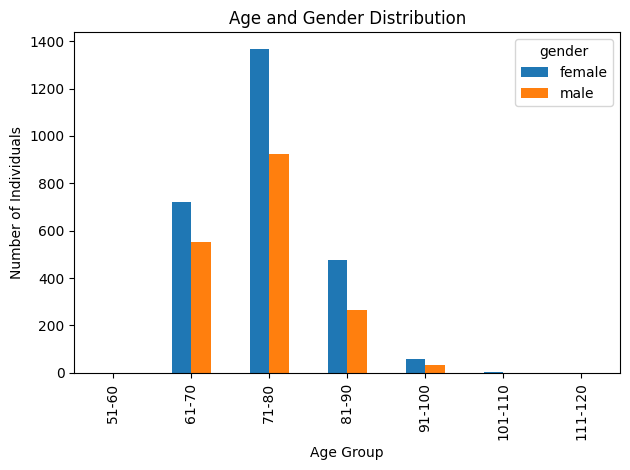

In [381]:
# Plot the Age and Gender distribution

plt.figure(figsize=(10, 6))
age_gender_distribution.plot(kind='bar', stacked=False)
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.title('Age and Gender Distribution')
plt.tight_layout()
plt.show()


In [382]:
# Health Status by Gender: Create a distribution table that categorizes individuals by their health status, differentiated by gender.

health_gender_distribution = healthcare_3.pivot_table(index='health', columns='gender', values='actual_age', aggfunc='count')
print(health_gender_distribution)

gender     female  male
health                 
average      2093  1416
excellent     193   150
poor          342   212


<Figure size 1000x600 with 0 Axes>

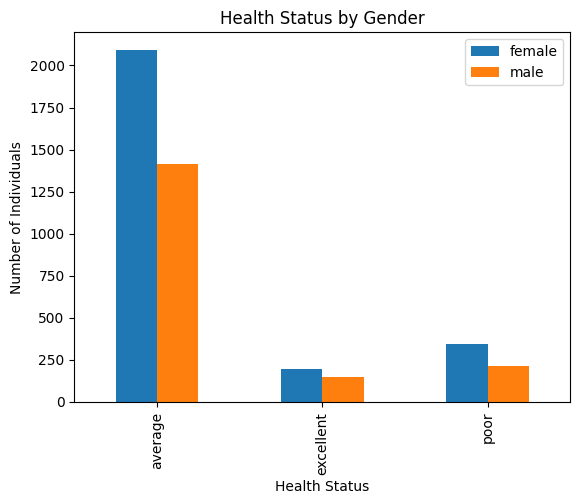

In [383]:
# plot the distribution of health and gender

plt.figure(figsize=(10, 6))
health_gender_distribution.plot(kind='bar', stacked=False)
plt.xlabel('Health Status')
plt.ylabel('Number of Individuals')
plt.title('Health Status by Gender')
plt.legend()
plt.show()

In [384]:
# Regional Income Distribution: Prepare a table to display the income distribution across various regions.

regional_income_distribution = healthcare_3.pivot_table(index='region', columns='gender', values='actual_income', aggfunc='mean')
print(regional_income_distribution)

gender           female          male
region                               
midwest    22495.298828  29038.324219
northeast  24869.339844  29743.857422
other      19174.509766  25346.189453
west       26715.240234  37632.585938


<Figure size 1000x600 with 0 Axes>

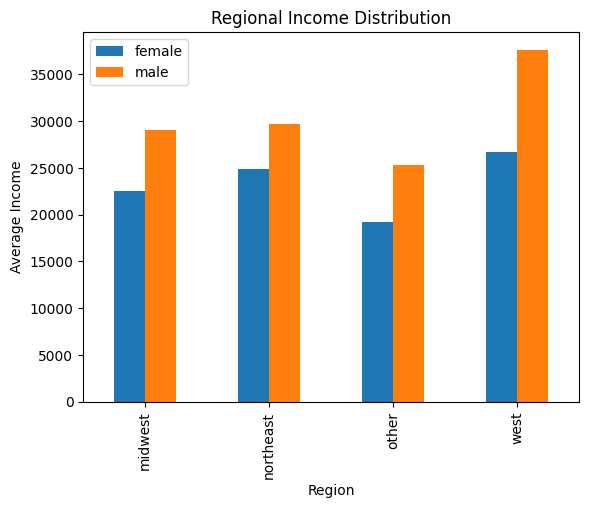

In [385]:
# Plot the Regional Income Distribution

plt.figure(figsize=(10, 6))
regional_income_distribution.plot(kind='bar', stacked=False)
plt.xlabel('Region')
plt.ylabel('Average Income')
plt.title('Regional Income Distribution')
plt.legend()
plt.show()

In [386]:
# Age-wise Income Analysis: Develop a table to analyze the relationship between age and income.

age_income_analysis = healthcare_3.pivot_table(index='age_group', columns='gender', values='actual_income', aggfunc='mean')
print(age_income_analysis)

gender           female          male
age_group                            
61-70      25169.769531  31360.433594
71-80      22040.095703  29615.498047
81-90      19498.833984  25426.800781
91-100     24770.134766  22253.646484
101-110         14373.5       17619.0


<Figure size 1000x600 with 0 Axes>

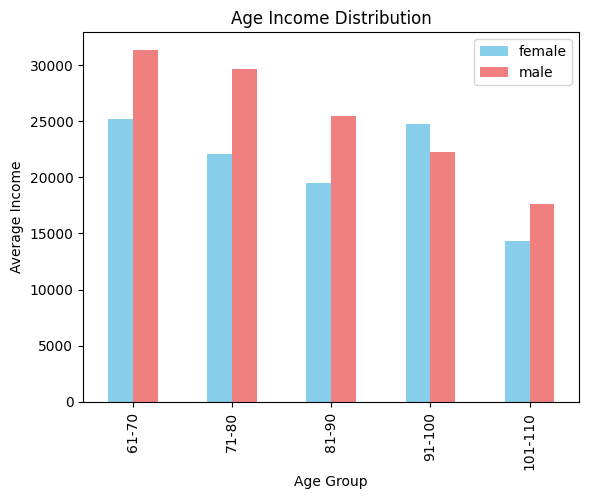

In [387]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon'] # Example colors
if len(age_income_analysis) == len(colors):
    plt.figure(figsize=(10, 6))
    age_income_analysis.plot(kind='bar', stacked=False, color=colors)
    plt.xlabel('Age Group')
    plt.ylabel('Average Income')
    plt.title('Age Income Distribution')
    plt.legend()
    plt.show()
else:
    print("Number of colors in the list does not match the number of bars.")

In [388]:
healthcare_3.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,...,gender,married,school,income,employed,insurance,medicaid,actual_age,actual_income,age_group
0,5,0,0,0,0,1,average,2,normal,other,...,male,yes,6,2.881,yes,yes,no,69.0,28809.0,61-70
1,1,0,2,0,2,0,average,2,normal,other,...,female,yes,10,2.7478,no,yes,no,74.0,27477.0,71-80
2,13,0,0,0,3,3,poor,4,limited,other,...,female,no,10,0.6532,no,no,yes,66.0,6532.0,61-70
3,16,0,5,0,1,1,poor,2,limited,other,...,male,yes,3,0.6588,no,yes,no,76.0,6588.0,71-80
4,3,0,0,0,0,0,average,2,limited,other,...,female,yes,6,0.6588,no,yes,no,79.0,6588.0,71-80


In [389]:
# Is there a correlation between the health, school, insurance and medicaid

# convert the health and adl to categorical encoding as it has an ordinal relationship

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

healthcare_3['health_encoded'] = le.fit_transform(healthcare_3['health'])

healthcare_3['adl_encoded'] = le.fit_transform(healthcare_3['adl'])

# Convert gender, married, region, employed, insurance, medicaid to One hot encoding

healthcare_3 = pd.get_dummies(healthcare_3, columns=['gender'], prefix='gender')
healthcare_3 = pd.get_dummies(healthcare_3, columns=['married'], prefix='married')
healthcare_3 = pd.get_dummies(healthcare_3, columns=['region'], prefix='region')
healthcare_3 = pd.get_dummies(healthcare_3, columns=['employed'], prefix='employed')
healthcare_3 = pd.get_dummies(healthcare_3, columns=['insurance'], prefix='insurance')
healthcare_3 = pd.get_dummies(healthcare_3, columns=['medicaid'], prefix='medicaid')

healthcare_3.head()


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,age,...,region_midwest,region_northeast,region_other,region_west,employed_no,employed_yes,insurance_no,insurance_yes,medicaid_no,medicaid_yes
0,5,0,0,0,0,1,average,2,normal,6.9,...,False,False,True,False,False,True,False,True,True,False
1,1,0,2,0,2,0,average,2,normal,7.4,...,False,False,True,False,True,False,False,True,True,False
2,13,0,0,0,3,3,poor,4,limited,6.6,...,False,False,True,False,True,False,True,False,False,True
3,16,0,5,0,1,1,poor,2,limited,7.6,...,False,False,True,False,True,False,False,True,True,False
4,3,0,0,0,0,0,average,2,limited,7.9,...,False,False,True,False,True,False,False,True,True,False


In [390]:
healthcare_3['gender_female'] = healthcare_3['gender_female'].astype(np.int32)
healthcare_3['gender_male'] = healthcare_3['gender_male'].astype(np.int32)
healthcare_3['married_no'] = healthcare_3['married_no'].astype(np.int32)
healthcare_3['married_yes'] = healthcare_3['married_yes'].astype(np.int32)
healthcare_3['region_northeast'] = healthcare_3['region_northeast'].astype(np.int32)
healthcare_3['region_midwest'] = healthcare_3['region_midwest'].astype(np.int32)
healthcare_3['region_other'] = healthcare_3['region_other'].astype(np.int32)
healthcare_3['region_west'] = healthcare_3['region_west'].astype(np.int32)
healthcare_3['employed_no'] = healthcare_3['employed_no'].astype(np.int32)
healthcare_3['employed_yes'] = healthcare_3['employed_yes'].astype(np.int32)
healthcare_3['insurance_no'] = healthcare_3['insurance_no'].astype(np.int32)
healthcare_3['insurance_yes'] = healthcare_3['insurance_yes'].astype(np.int32)
healthcare_3['medicaid_no'] = healthcare_3['medicaid_no'].astype(np.int32)
healthcare_3['medicaid_yes'] = healthcare_3['medicaid_yes'].astype(np.int32)

healthcare_3.head()


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,age,...,region_midwest,region_northeast,region_other,region_west,employed_no,employed_yes,insurance_no,insurance_yes,medicaid_no,medicaid_yes
0,5,0,0,0,0,1,average,2,normal,6.9,...,0,0,1,0,0,1,0,1,1,0
1,1,0,2,0,2,0,average,2,normal,7.4,...,0,0,1,0,1,0,0,1,1,0
2,13,0,0,0,3,3,poor,4,limited,6.6,...,0,0,1,0,1,0,1,0,0,1
3,16,0,5,0,1,1,poor,2,limited,7.6,...,0,0,1,0,1,0,0,1,1,0
4,3,0,0,0,0,0,average,2,limited,7.9,...,0,0,1,0,1,0,0,1,1,0


In [391]:
corr_columns = healthcare_3[['gender_female', 'gender_male', 'married_no', 'married_yes', 'employed_no', 'employed_yes', 'actual_age', 'actual_income', 'health_encoded', 'adl_encoded', 'insurance_no', 'insurance_yes', 'medicaid_no', 'medicaid_yes']]
corr_matrix = corr_columns.corr()
corr_matrix


,gender_female,gender_male,married_no,married_yes,employed_no,employed_yes,actual_age,actual_income,health_encoded,adl_encoded,insurance_no,insurance_yes,medicaid_no,medicaid_yes
gender_female,1.000000,-1.000000,0.387546,-0.387546,0.119169,-0.119169,0.056885,-0.115621,0.007766,-0.107657,0.043846,-0.043846,-0.128886,0.128886
gender_male,-1.000000,1.000000,-0.387546,0.387546,-0.119169,0.119169,-0.056885,0.115621,-0.007766,0.107657,-0.043846,0.043846,0.128886,-0.128886
married_no,0.387546,-0.387546,1.000000,-1.000000,0.068215,-0.068215,0.250550,-0.252081,0.043348,-0.174112,0.191352,-0.191352,-0.203469,0.203469
married_yes,-0.387546,0.387546,-1.000000,1.000000,-0.068215,0.068215,-0.250550,0.252081,-0.043348,0.174112,-0.191352,0.191352,0.203469,-0.203469
employed_no,0.119169,-0.119169,0.068215,-0.068215,1.000000,-1.000000,0.176991,-0.168323,0.038896,-0.123698,0.067523,-0.067523,-0.089396,0.089396
employed_yes,-0.119169,0.119169,-0.068215,0.068215,-1.000000,1.000000,-0.176991,0.168323,-0.038896,0.123698,-0.067523,0.067523,0.089396,-0.089396
actual_age,0.056885,-0.056885,0.250550,-0.250550,0.176991,-0.176991,1.000000,-0.073136,0.080461,-0.313580,0.084493,-0.084493,-0.093132,0.093132
actual_income,-0.115621,0.115621,-0.252081,0.252081,-0.168323,0.168323,-0.073136,1.000000,-0.048650,0.096028,-0.158342,0.158342,0.150779,-0.150779
health_encoded,0.007766,-0.007766,0.043348,-0.043348,0.038896,-0.038896,0.080461,-0.048650,1.000000,-0.286757,0.113836,-0.113836,-0.124563,0.124563
adl_encoded,-0.107657,0.107657,-0.174112,0.174112,-0.123698,0.123698,-0.313580,0.096028,-0.286757,1.000000,-0.152778,0.152778,0.217053,-0.217053


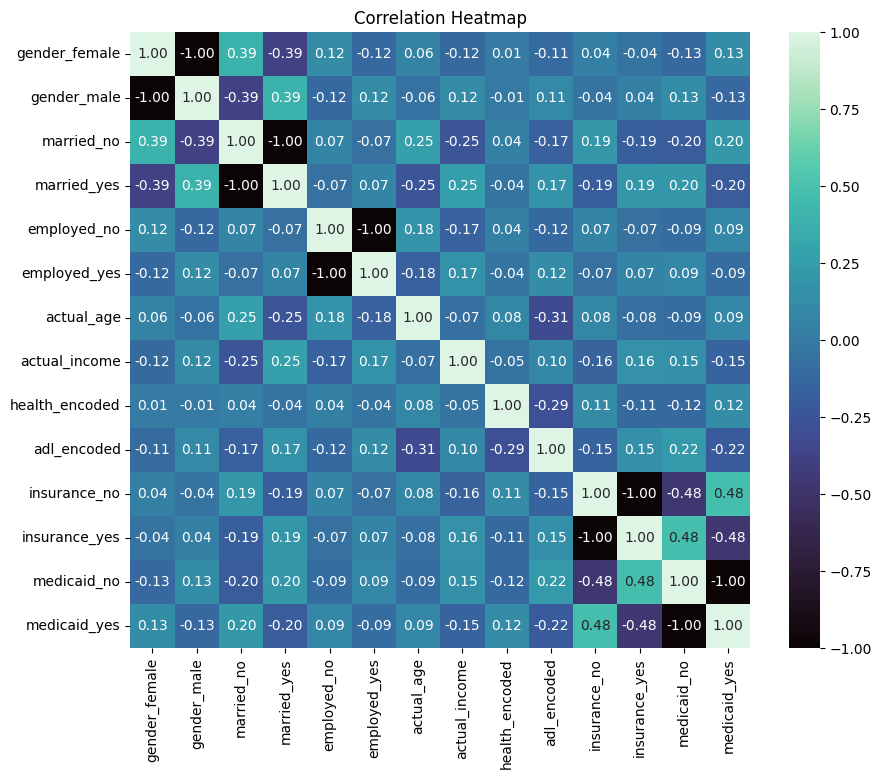

In [392]:
# PLot te correlation

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()